# **Flight Ticket Price Prediction Using Deep Learning Techniques**

In [4]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import scipy.stats as stats
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression, Ridge, Lasso  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  
plt.rcParams["figure.figsize"] = (10,6)  
import warnings
warnings.filterwarnings('ignore') 

In [6]:
df = pd.read_csv("THY_Flight_Ticket_Pricing_Dataset.csv") 
df

,distance_km,flight_duration_min,days_until_flight,seat_class,departure_hour,day_of_week,baggage_weight_kg,aircraft_age_years,fuel_price_per_litre,number_of_transfers,ticket_price
0,4682.119391,30132.324665,328,2,14,0,32.961831,19.665091,1.477519,0,4700.014770
1,11423.357385,75253.620662,41,1,18,6,8.416552,7.930770,0.843682,0,9096.183526
2,8864.329119,63285.387158,54,1,21,5,3.329512,0.342607,0.990784,0,7723.278926
3,7304.304265,48842.700486,10,2,9,1,19.758324,18.001013,0.604489,1,6390.470790
4,2125.418093,15073.198483,146,3,2,3,29.003606,18.149702,1.433039,1,3299.539191
...,...,...,...,...,...,...,...,...,...,...,...
99995,9569.966519,60514.512104,261,2,23,1,21.228205,15.679101,0.846319,0,7918.029053
99996,9417.258874,59371.917354,268,1,14,3,34.867012,6.245600,0.518069,1,7095.107427
99997,8191.104865,63261.425386,83,1,8,3,26.829327,18.923951,0.785810,2,7273.811119
99998,6143.532763,38347.823739,28,1,9,4,15.560962,14.638501,0.914594,2,4578.074724


In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   distance_km           100000 non-null  float64
 1   flight_duration_min   100000 non-null  float64
 2   days_until_flight     100000 non-null  int64  
 3   seat_class            100000 non-null  int64  
 4   departure_hour        100000 non-null  int64  
 5   day_of_week           100000 non-null  int64  
 6   baggage_weight_kg     100000 non-null  float64
 7   aircraft_age_years    100000 non-null  float64
 8   fuel_price_per_litre  100000 non-null  float64
 9   number_of_transfers   100000 non-null  int64  
 10  ticket_price          100000 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 8.4 MB


In [10]:
df.describe()

,distance_km,flight_duration_min,days_until_flight,seat_class,departure_hour,day_of_week,baggage_weight_kg,aircraft_age_years,fuel_price_per_litre,number_of_transfers,ticket_price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,6144.012526,41634.837232,182.226980,2.001680,11.493490,2.996620,20.019786,12.497914,1.000749,0.999100,5663.349544
std,3373.594930,23684.652482,104.896241,0.817193,6.919549,1.995141,11.534103,7.221617,0.288492,0.815589,2671.697582
min,300.064779,1664.558206,1.000000,1.000000,0.000000,0.000000,0.001085,0.000151,0.500003,0.000000,206.978264
25%,3219.688661,21457.793678,91.000000,1.000000,5.000000,1.000000,10.086226,6.229690,0.750762,0.000000,3417.708984
50%,6157.368450,40986.456396,182.000000,2.000000,12.000000,3.000000,19.996900,12.507852,1.001863,1.000000,5605.777358
75%,9069.310654,60418.942858,273.000000,3.000000,18.000000,5.000000,29.981389,18.742649,1.250224,2.000000,7788.683022
max,11999.906895,102284.907693,364.000000,3.000000,23.000000,6.000000,39.999876,24.999844,1.499987,2.000000,13066.854434


In [12]:
df.corr()

,distance_km,flight_duration_min,days_until_flight,seat_class,departure_hour,day_of_week,baggage_weight_kg,aircraft_age_years,fuel_price_per_litre,number_of_transfers,ticket_price
distance_km,1.000000,0.964939,-0.009203,-0.001115,0.001225,0.000248,0.003315,0.001923,0.003230,-0.004134,0.956813
flight_duration_min,0.964939,1.000000,-0.009213,0.000850,0.000746,0.001154,0.003586,0.002589,0.004560,-0.002427,0.984572
days_until_flight,-0.009203,-0.009213,1.000000,-0.001114,-0.000624,-0.002436,0.003436,0.002520,0.004596,0.004611,-0.029001
seat_class,-0.001115,0.000850,-0.001114,1.000000,0.003516,-0.001843,0.004468,0.005970,-0.002897,0.005524,0.153048
departure_hour,0.001225,0.000746,-0.000624,0.003516,1.000000,-0.003394,-0.003224,-0.001629,-0.000706,0.000026,0.006528
day_of_week,0.000248,0.001154,-0.002436,-0.001843,-0.003394,1.000000,0.000149,-0.005068,-0.002311,0.001153,0.000919
baggage_weight_kg,0.003315,0.003586,0.003436,0.004468,-0.003224,0.000149,1.000000,-0.003835,0.001646,-0.000171,0.025876
aircraft_age_years,0.001923,0.002589,0.002520,0.005970,-0.001629,-0.005068,-0.003835,1.000000,-0.004061,-0.003325,-0.023595
fuel_price_per_litre,0.003230,0.004560,0.004596,-0.002897,-0.000706,-0.002311,0.001646,-0.004061,1.000000,-0.000106,0.036395
number_of_transfers,-0.004134,-0.002427,0.004611,0.005524,0.000026,0.001153,-0.000171,-0.003325,-0.000106,1.000000,-0.062688


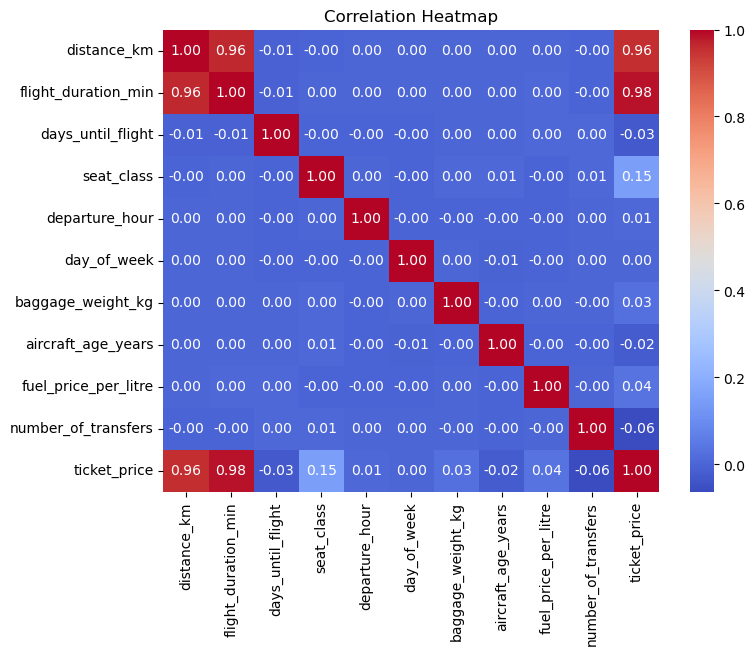

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
pip install tensorflow --upgrade

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Separate features and target
X = df.drop("ticket_price", axis=1)
y = df["ticket_price"]

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show shapes for verification
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (80000, 10)
X_test shape: (20000, 10)
y_train shape: (80000,)
y_test shape: (20000,)


In [28]:
# Standardize: Fit only on training data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [32]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Set the random seed
seed = 42  # You can choose any integer number
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))


optimizer = Adam(learning_rate=0.003)

model.compile(optimizer=optimizer, loss='mse')

In [38]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [40]:
model.fit(x = X_train, y = y_train, validation_split = 0.20, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 14455409.0000 - val_loss: 69508.4375
Epoch 2/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 57098.0234 - val_loss: 17823.4746
Epoch 3/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10724.0625 - val_loss: 2734.5916
Epoch 4/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2777.3669 - val_loss: 2562.3777
Epoch 5/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2708.4800 - val_loss: 2538.8958
Epoch 6/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2690.0793 - val_loss: 2638.9685
Epoch 7/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2747.9812 - val_loss: 2799.5767
Epoch 8/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2780.7957 - val_loss: 2555.2466
Epoch 9/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2727.9534 - val_loss: 2712.8796
Epoch 10/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2966.0173 - val_loss: 4354.9404
Epoch 11/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/s

<Axes: >

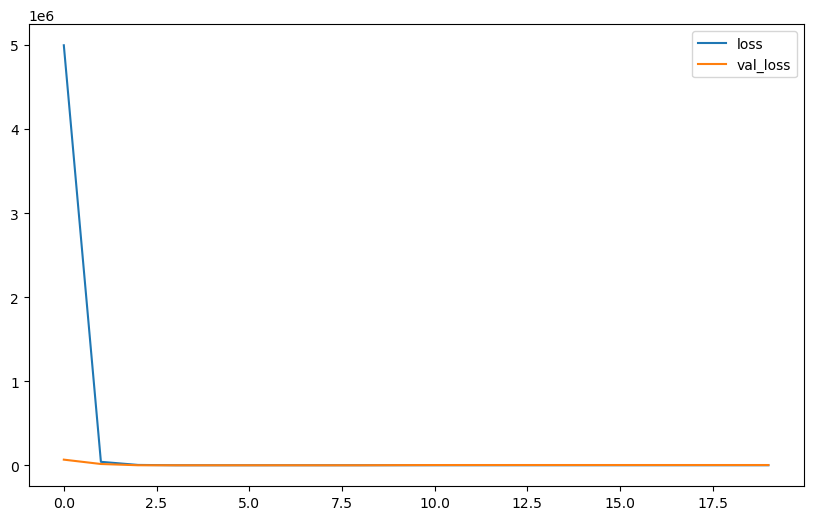

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [44]:
model.evaluate(X_test, y_test, verbose=0)

5521.57861328125

In [46]:
y_pred = model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [48]:
eval_metric(y_test, y_pred)

r2_score: 0.9992274992831961 
mae: 61.21137460923198 
mse: 5521.579514192114 
rmse: 74.30733149691297


In [52]:
from tensorflow.keras.layers import Dropout

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(learning_rate=0.002)

model.compile(optimizer=opt, loss='mse')

In [58]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 18)

In [60]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 700, callbacks = [early_stop])

Epoch 1/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 19768686.0000 - val_loss: 679654.8125
Epoch 2/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3596505.7500 - val_loss: 242713.9219
Epoch 3/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3508650.2500 - val_loss: 280597.2188
Epoch 4/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3418448.0000 - val_loss: 272037.0625
Epoch 5/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3371425.7500 - val_loss: 512886.0625
Epoch 6/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3328096.2500 - val_loss: 189198.3125
Epoch 7/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3283714.0000 - val_loss: 130542.8906
Epoch 8/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3208929.2500 - val_loss: 425187.5938
Epoch 9/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3190549.0000 - val_loss: 538505.3125
Epoch 10/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3160946.7500 - val_loss: 443015.9375
Epoch 11/700
532/5

<Axes: >

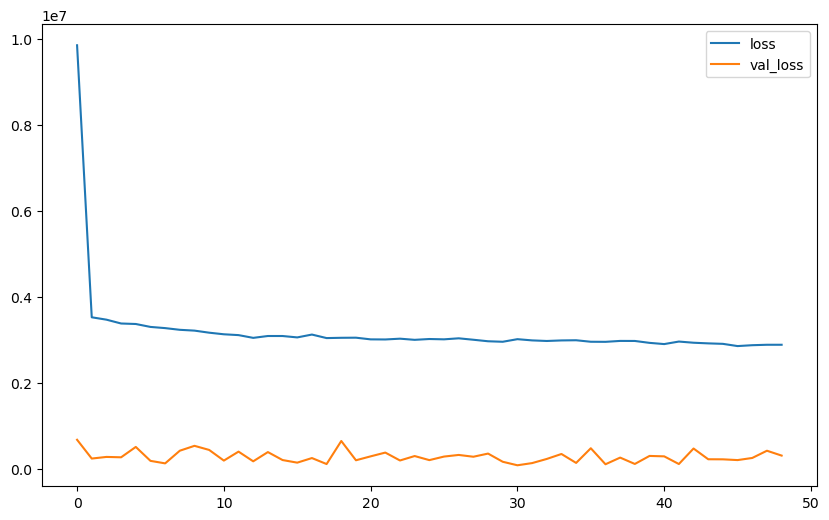

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [64]:
model.summary() # It shows how many parameters there are in each layer.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,413 (36.77 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,276 (24.52 KB)

In [66]:
model.evaluate(X_test, y_test, verbose=0)

309714.625

In [68]:
y_pred = model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [70]:
eval_metric(y_test, y_pred)

r2_score: 0.9566691566842072 
mae: 491.271050077338 
mse: 309714.5304602603 
rmse: 556.5200180229461


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1))

opt = Adam(learning_rate=0.003)

model.compile(optimizer=opt, loss='mse')

In [76]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [78]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 700, callbacks = [early_stop])

Epoch 1/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 39097684.0000 - val_loss: 38470328.0000
Epoch 2/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 37781844.0000 - val_loss: 35891056.0000
Epoch 3/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 35116792.0000 - val_loss: 32473336.0000
Epoch 4/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 31534576.0000 - val_loss: 27293472.0000
Epoch 5/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 27438794.0000 - val_loss: 23156850.0000
Epoch 6/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 23214538.0000 - val_loss: 18511996.0000
Epoch 7/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 19135700.0000 - val_loss: 16089417.0000
Epoch 8/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 15341362.0000 - val_loss: 11502958.0000
Epoch 9/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 12044126.0000 - val_loss: 8084675.0000
Epoch 10/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 9271440.0000 - val_loss: 6934

<Axes: >

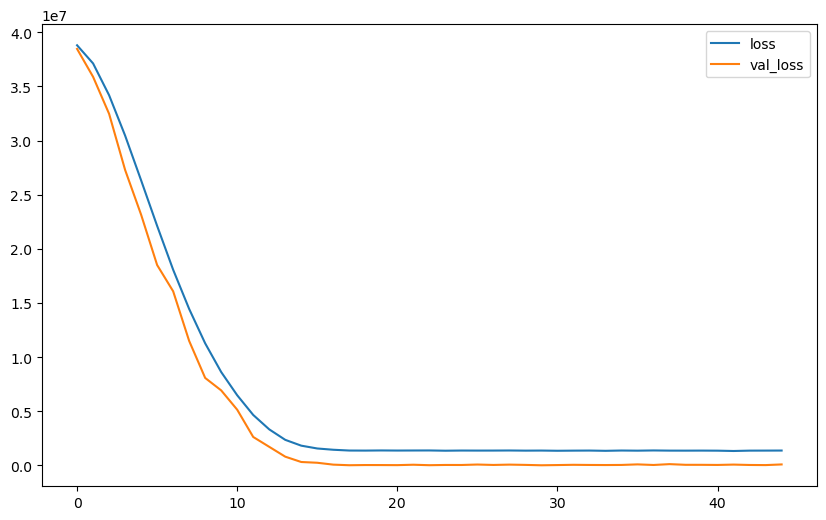

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [82]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,373 (40.52 KB)

 Trainable params: 3,377 (13.19 KB)

 Non-trainable params: 240 (960.00 B)

 Optimizer params: 6,756 (26.39 KB)

In [84]:
model.evaluate(X_test, y_test, verbose=0)

97463.109375

In [86]:
y_pred = model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [88]:
eval_metric(y_test, y_pred)

r2_score: 0.9863643586130331 
mae: 268.2038344279801 
mse: 97463.05279384545 
rmse: 312.19073143488015


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
import tensorflow as tf

tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.002)))  # L1 Regularization
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.002)))  # L2 Regularization
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.002)))  # L1 Regularization again
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.002)))  # L2 Regularization again
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))  # No regularization here (optional)
model.add(Dropout(0.2))

model.add(Dense(1))

opt = Adam(learning_rate=0.004)  

model.compile(optimizer=opt, loss='mse')

In [92]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 12)

In [94]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 700, callbacks = [early_stop])

Epoch 1/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 17516550.0000 - val_loss: 756902.2500
Epoch 2/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4963089.5000 - val_loss: 174377.6562
Epoch 3/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4679748.5000 - val_loss: 604442.8125
Epoch 4/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4706613.5000 - val_loss: 682203.8750
Epoch 5/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4639255.0000 - val_loss: 338935.6875
Epoch 6/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4594115.0000 - val_loss: 733530.4375
Epoch 7/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4595209.0000 - val_loss: 881202.5000
Epoch 8/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4568104.0000 - val_loss: 571311.0000
Epoch 9/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4538344.0000 - val_loss: 511728.2188
Epoch 10/700
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4495103.5000 - val_loss: 536842.6250
Epoch 11/700
532/5

<Axes: >

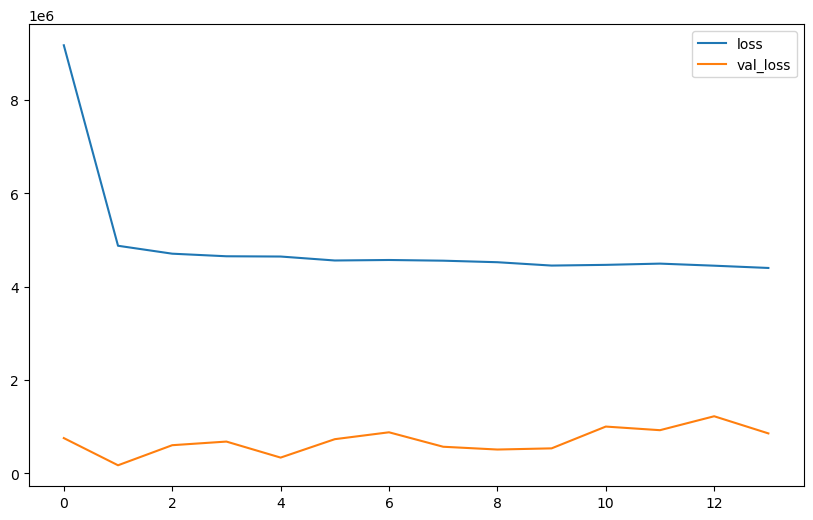

In [96]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [98]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,413 (36.77 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,276 (24.52 KB)

In [100]:
model.evaluate(X_test, y_test, verbose=0)

853169.75

In [102]:
y_pred = model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [104]:
eval_metric(y_test, y_pred)

r2_score: 0.8806367311057947 
mae: 826.8779885511282 
mse: 853169.1504443117 
rmse: 923.6715598329915


**Model Evaluation :**

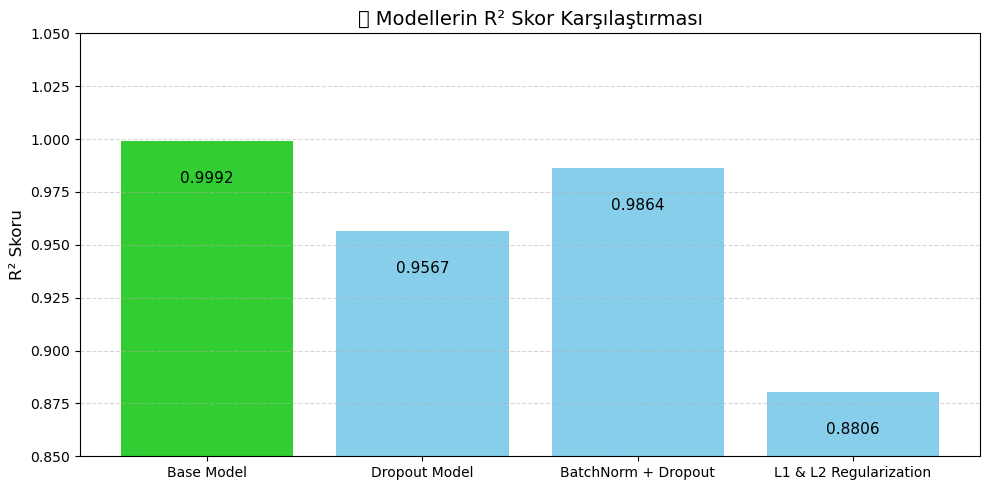

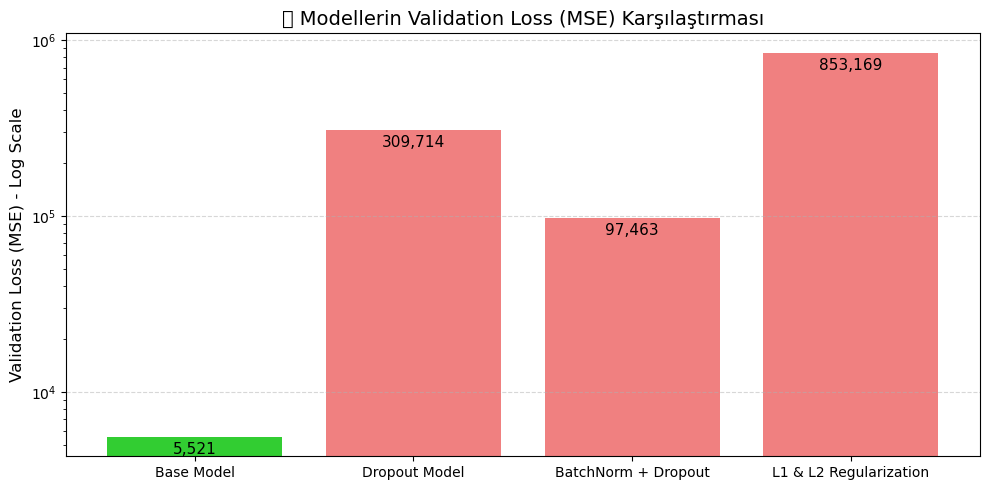

In [112]:
import matplotlib.pyplot as plt

# Yeni veriler
models = ['Base Model', 'Dropout Model', 'BatchNorm + Dropout', 'L1 & L2 Regularization']
r2_scores = [0.9992, 0.9567, 0.9864, 0.8806]
val_losses = [5521, 309714, 97463, 853169]

# === 1. R² Skor Grafiği ===
plt.figure(figsize=(10, 5))
colors = ['skyblue' if r2 < max(r2_scores) else 'limegreen' for r2 in r2_scores]

bars = plt.bar(models, r2_scores, color=colors)
plt.ylim(0.85, 1.05)
plt.ylabel("R² Skoru", fontsize=12)
plt.title("📊 Modellerin R² Skor Karşılaştırması", fontsize=14)

# Bar üstüne değer yaz
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval - 0.02, f"{yval:.4f}", ha='center', fontsize=11)

plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# === 2. Validation Loss (MSE) Grafiği ===
plt.figure(figsize=(10, 5))
colors = ['lightcoral' if loss > min(val_losses) else 'limegreen' for loss in val_losses]

bars = plt.bar(models, val_losses, color=colors)
plt.yscale('log')  # Log scale, çünkü değerler çok farklı seviyelerde
plt.ylabel("Validation Loss (MSE) - Log Scale", fontsize=12)
plt.title("📉 Modellerin Validation Loss (MSE) Karşılaştırması", fontsize=14)

# Bar üstüne değer yaz
for bar, loss in zip(bars, val_losses):
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height()*0.8,
             f"{int(loss):,}", ha='center', fontsize=11)

plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


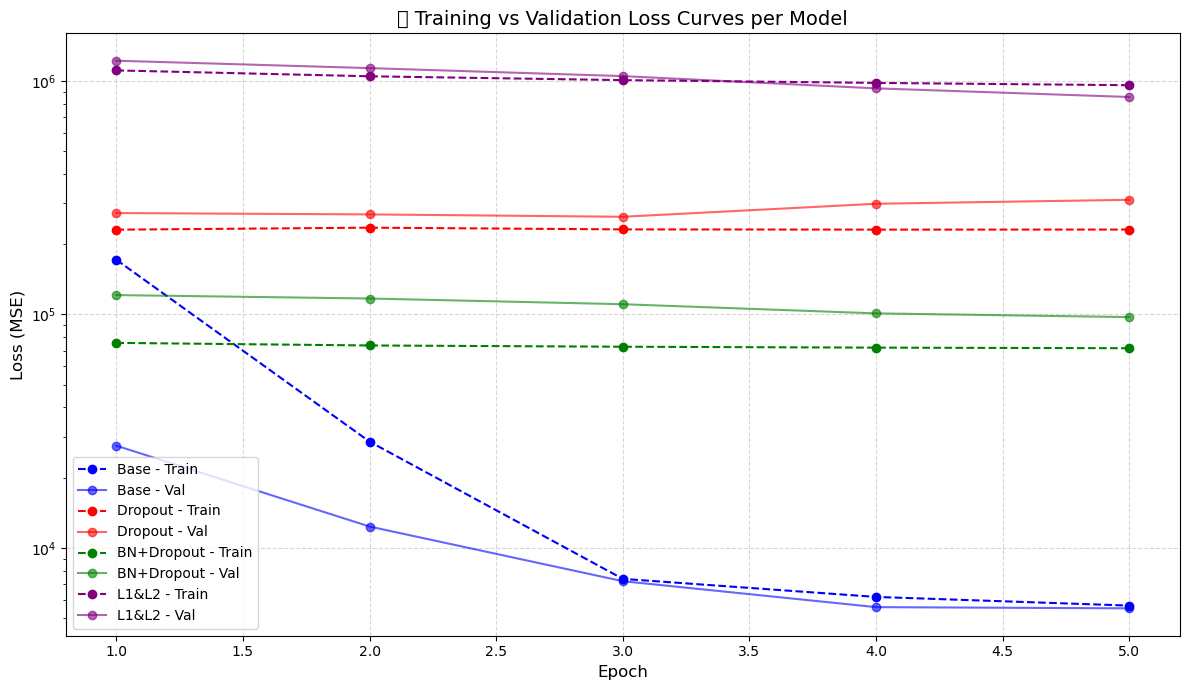

In [114]:
import matplotlib.pyplot as plt

# Her modelin history nesnesinden gelen veriler
# Örnek değerler girildi — sen kendi history nesnenden alarak değiştirebilirsin

# Base Model
base_train_loss = [171562.6, 28561.3, 7382.7, 6179.0, 5672.9]
base_val_loss = [27442.4, 12366.6, 7215.7, 5587.6, 5521.6]

# Dropout Model
dropout_train_loss = [230714.3, 235334.8, 231356.6, 230847.3, 230982.2]
dropout_val_loss = [271783.5, 268199.6, 262007.2, 297848.6, 309714.2]

# BatchNorm + Dropout
bn_dropout_train_loss = [75591.6, 73683.7, 72778.1, 72127.1, 71712.5]
bn_dropout_val_loss = [121083.5, 117064.2, 110653.1, 101105.9, 97463.7]

# L1 & L2 Regularization
reg_train_loss = [1108950.5, 1046500.3, 1007627.5, 980366.1, 958388.2]
reg_val_loss = [1220050.8, 1134263.7, 1048313.0, 928993.3, 853169.8]

epochs = list(range(1, 6))

# === Grafik ===
plt.figure(figsize=(12, 7))

# Her model için çizim
plt.plot(epochs, base_train_loss, '--o', label='Base - Train', color='blue')
plt.plot(epochs, base_val_loss, '-o', label='Base - Val', color='blue', alpha=0.6)

plt.plot(epochs, dropout_train_loss, '--o', label='Dropout - Train', color='red')
plt.plot(epochs, dropout_val_loss, '-o', label='Dropout - Val', color='red', alpha=0.6)

plt.plot(epochs, bn_dropout_train_loss, '--o', label='BN+Dropout - Train', color='green')
plt.plot(epochs, bn_dropout_val_loss, '-o', label='BN+Dropout - Val', color='green', alpha=0.6)

plt.plot(epochs, reg_train_loss, '--o', label='L1&L2 - Train', color='purple')
plt.plot(epochs, reg_val_loss, '-o', label='L1&L2 - Val', color='purple', alpha=0.6)

plt.yscale("log")  # Çünkü loss değerleri farklı seviyelerde
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss (MSE)", fontsize=12)
plt.title("📉 Training vs Validation Loss Curves per Model", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 🧠 Interpretation

### 🚀 Best Performing Technique
The **Base Model** achieved the highest performance with the **lowest validation loss (5521)** and the **highest R² score (0.9992)**. This indicates that a simpler architecture without any additional regularization or normalization was able to generalize very well on the given dataset.

### ✅ Techniques That Improved Performance
- The **Batch Normalization + Dropout** model also performed strongly, with a high R² score (0.9864) and relatively low validation loss (97,463).
    - Batch Normalization helped stabilize the training process.
    - Dropout reduced overfitting by randomly deactivating neurons during training.
- This combination clearly outperformed the model using only Dropout, suggesting that regularization is more effective when combined with normalization.

### ❌ Techniques That Decreased Performance
- The **Dropout-only Model** showed a decline in performance with a **validation loss of 309,714** and an **R² score of 0.9567**.
    - This may indicate that the Dropout rate was too high or the model architecture was too simple.
- The **L1 & L2 Regularization Model** performed the worst, with the **lowest R² score (0.8806)** and the **highest validation loss (853,169)**.
    - This suggests that the regularization penalties were too strong, limiting the model’s learning capacity.

### 🧩 General Conclusion
- More complex regularization techniques (Dropout, L1/L2) do not always guarantee better performance, especially on smaller or well-structured datasets.
- The **Base Model** likely had just the right capacity to fit the data without overfitting.
- On larger datasets or more complex problems, techniques like **Batch Normalization + Dropout** may provide better generalization.
